In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

Criação da classe Dados, que vai conter as informações

In [2]:
# Leitura de dados

class Dados:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos
        
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
#             Dy = []
            data = [x_data,y_data]
#             data = data.append(Dy)

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
#                 Dy.append(float(i[2]))

            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
#             Dy = []
            data = [x_data,y_data]
#             data = data.append(Dy)

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
#                 Dy.append(float(i[2]))

            return data

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)

dados1 = Dados(tabela('170-30-0,5-65'), tabela_picos('170-30-0,5-65'))
dados2 = Dados(tabela('170-30-1,5-65'), tabela_picos('170-30-1,5-65'))
dados3 = Dados(tabela('170-30-2,5-65'), tabela_picos('170-30-2,5-65'))

dados1.dp()

[[10.61, 15.06, 19.6, 24.2, 28.83], [0.0926, 0.186, 0.3322, 0.5396, 0.8017]]

In [104]:
# Definição da função a ser plotada
def func(x, A, B, C):
    return A*x**2 + B*x + C

In [116]:
# Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
popt, pcov = curve_fit(
    f = func,
    xdata = dados1.dp()[0],
    ydata = dados1.dp()[1],
#     sigma = Dy
)

A_p, B_p, C_p = popt
perr = np.sqrt(np.diag(pcov))
DA, DB, DC = perr

print("A:", A_p,"+-", DA)
print("B:", B_p,"+-", DB)
print("C:", C_p,"+-", DC)

A: 0.0013174472090963516 +- 1.4698897147955098e-05
B: -0.013040250876040936 +- 0.0005851774969002085
C: 0.08283312827062728 +- 0.0053626371043411685


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_42215/1292839193.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_42215/1292839193.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  parabola = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')


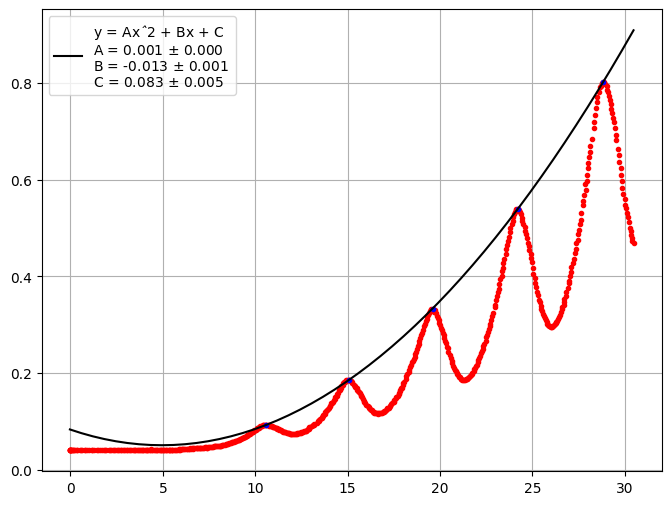

In [120]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
parabola = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')
# define ajuste a partir dos parametros
xModel = np.linspace(min(dados1.d()[0]), max(dados1.d()[0]))
yModel = func(xModel, A_p, B_p, C_p)
# plot do ajuste
grafico.plot(xModel, yModel,  color = 'black', label= f'y = Ax$ˆ2$ + Bx + C \nA = {A_p:.3f} $\pm$ {DA:.3f} \nB = {B_p:.3f} $\pm$ {DB:.3f} \nC = {C_p:.3f} $\pm$ {DC:.3f}' )
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
#    grafico.set_xlabel('Ângulo (rad)') # eixo x
#    grafico.set_ylabel('Voltagem (V)') # eixo y
#    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência de 25°)') #título
grafico.legend(loc = 'upper left')

#    plt.savefig('Acr25graus.png')
plt.show()


In [88]:
x_ajuste = np.interp(dados1.dp()[1], yModel, xModel)

x_ajuste = np.array(x_ajuste)

x_ajuste

len(dados1.dp()[1])
y_ajuste = np.linspace(1, len(dados1.dp()[1]), len(dados1.dp()[1]))


In [90]:
# Definição da função a ser plotada
def func(x, A, B):
    return A*x + B

In [91]:
# Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
popt, pcov = curve_fit(
    f = func,
    xdata = np.linspace(1, len(dados1.dp()[1]), len(dados1.dp()[1])),
    ydata = x_ajuste,
#     sigma = Dy
)

A_p, B_p= popt
perr = np.sqrt(np.diag(pcov))
DA, DB = perr

print("A:", A_p,"+-", DA)
print("B:", B_p,"+-", DB)

A: 4.558937155712459 +- 0.021621970796763434
B: 5.980513031169492 +- 0.07171196466034593


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_42215/3288158836.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(y_ajuste, x_ajuste, 'D', marker = '.', color = 'red')


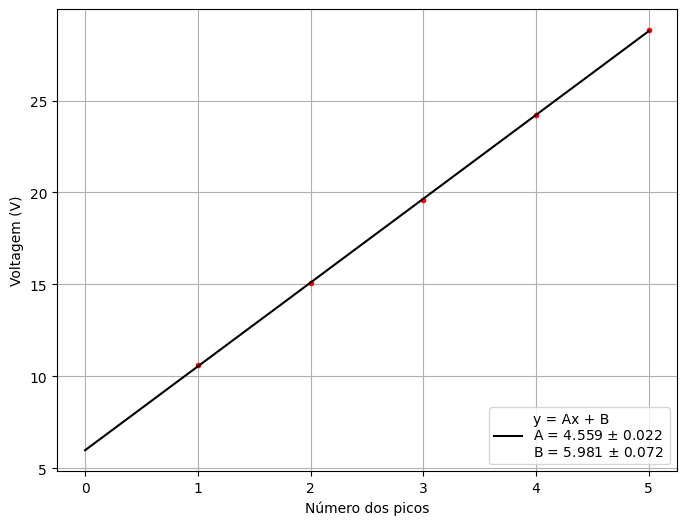

In [100]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico.plot(y_ajuste, x_ajuste, 'D', marker = '.', color = 'red')
# define ajuste a partir dos parametros
xModel = np.linspace(0, max(y_ajuste))
yModel = func(xModel, A_p, B_p)
# plot do ajuste
grafico.plot(xModel, yModel,  color = 'black', label= f"y = Ax + B \nA = {A_p:.3f} $\pm$ {DA:.3f} \nB = {B_p:.3f} $\pm$ {DB:.3f}")
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('Número dos picos') # eixo x
grafico.set_ylabel('Voltagem (V)') # eixo y
#    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência de 25°)') #título
grafico.legend(loc = 'lower right')

#    plt.savefig('Acr25graus.png')
plt.show()


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_3502/3873213279.py:37: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


38
Chi quadrado = 23.32


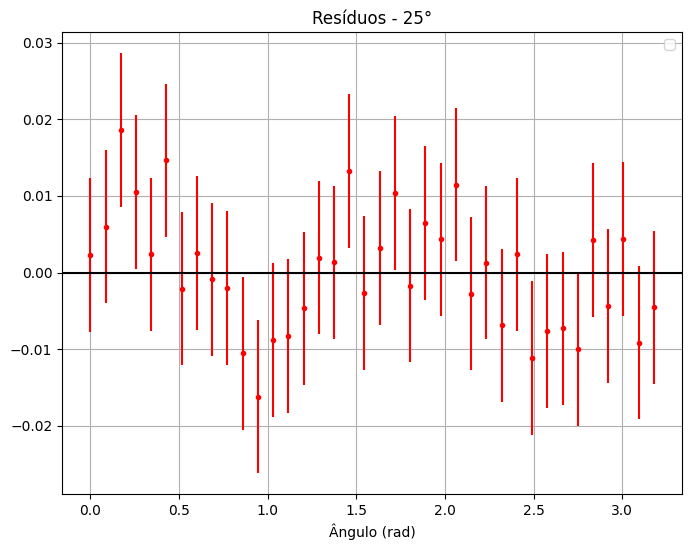

In [6]:
# Resíduos:

yAjuste = []
for i in xData:
    np.append(yAjuste,func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i in yAjuste:
    np.append(residuosAbsolutos, yData[i] - yAjuste[i])


# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.plot
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 25°') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos25.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)